# Dispersion function and dispersion curve tracing for P-SV normal modes
The examples include surface waves, Lamb waves (known as plate waves), guided waves (perfect waveguide), and embedded waves (imperfect waveguide sandwiched between two half-spaces). The dispersion function $D(f,c)$, function of frequency $f$ and phase velocity $c$, is complex-valued a priori. However, in the first three examples, it is real-valued. In the last example (embedded waves), it is real-valued for normal modes. For leaky modes it is complex-valued and will be treated in a separate notebook. The roots of the dispersion function determine the modes eigenvalues (dispersion curves).

In [1]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import ctypes
import math
import time
import dispersion as disp
from roots_finding import *

### Surface waves (Rayleigh waves)
Reproduce some results from Buchen and Ben-Hador (1996)

In [2]:
# Model
nlayers=3 # number of layers
vp=np.array([6.14, 5.5, 8.26]) # P-wave speed in km/s per layer (from top to bottom)
vs=np.array([3.39,3.18,4.65]) # S-wave speed in km/s
rho=np.array([2.7,2.7,3.0]) # density in g/cc
d=np.array([13.6,11.85,100]) # thickness in km, last layer is a half-space

# define the size of the map
cmin=3.1 # km/s
cmax=3.6
nc=200
H=d[0]+d[1] # total thickness
khmin=0 # wavenumber x thickness
khmax=100
nkh=200

kh=np.linspace(khmin,khmax,num=nkh,dtype='float64')
c=np.linspace(cmin,cmax,num=nc,dtype='float64')
f=c*kh/(2*H*math.pi)

fmin=f[0]
fmax=f[-1]

# c-f (phase velocity-frequency) dispersion function map D(f,c)
surface_waves_map=np.zeros((nc,nkh),dtype='complex64') # free surface on top, the last layer is considered as a half space
for i in range(nc):
    for j in range(nkh):
        surface_waves_map[i][j] = disp.free_solid_halfspace(frequency=f[j],wavenumber=2*math.pi*f[j]/c[i],nlayers=nlayers,vp=vp,vs=vs,density=rho,thickness=d)

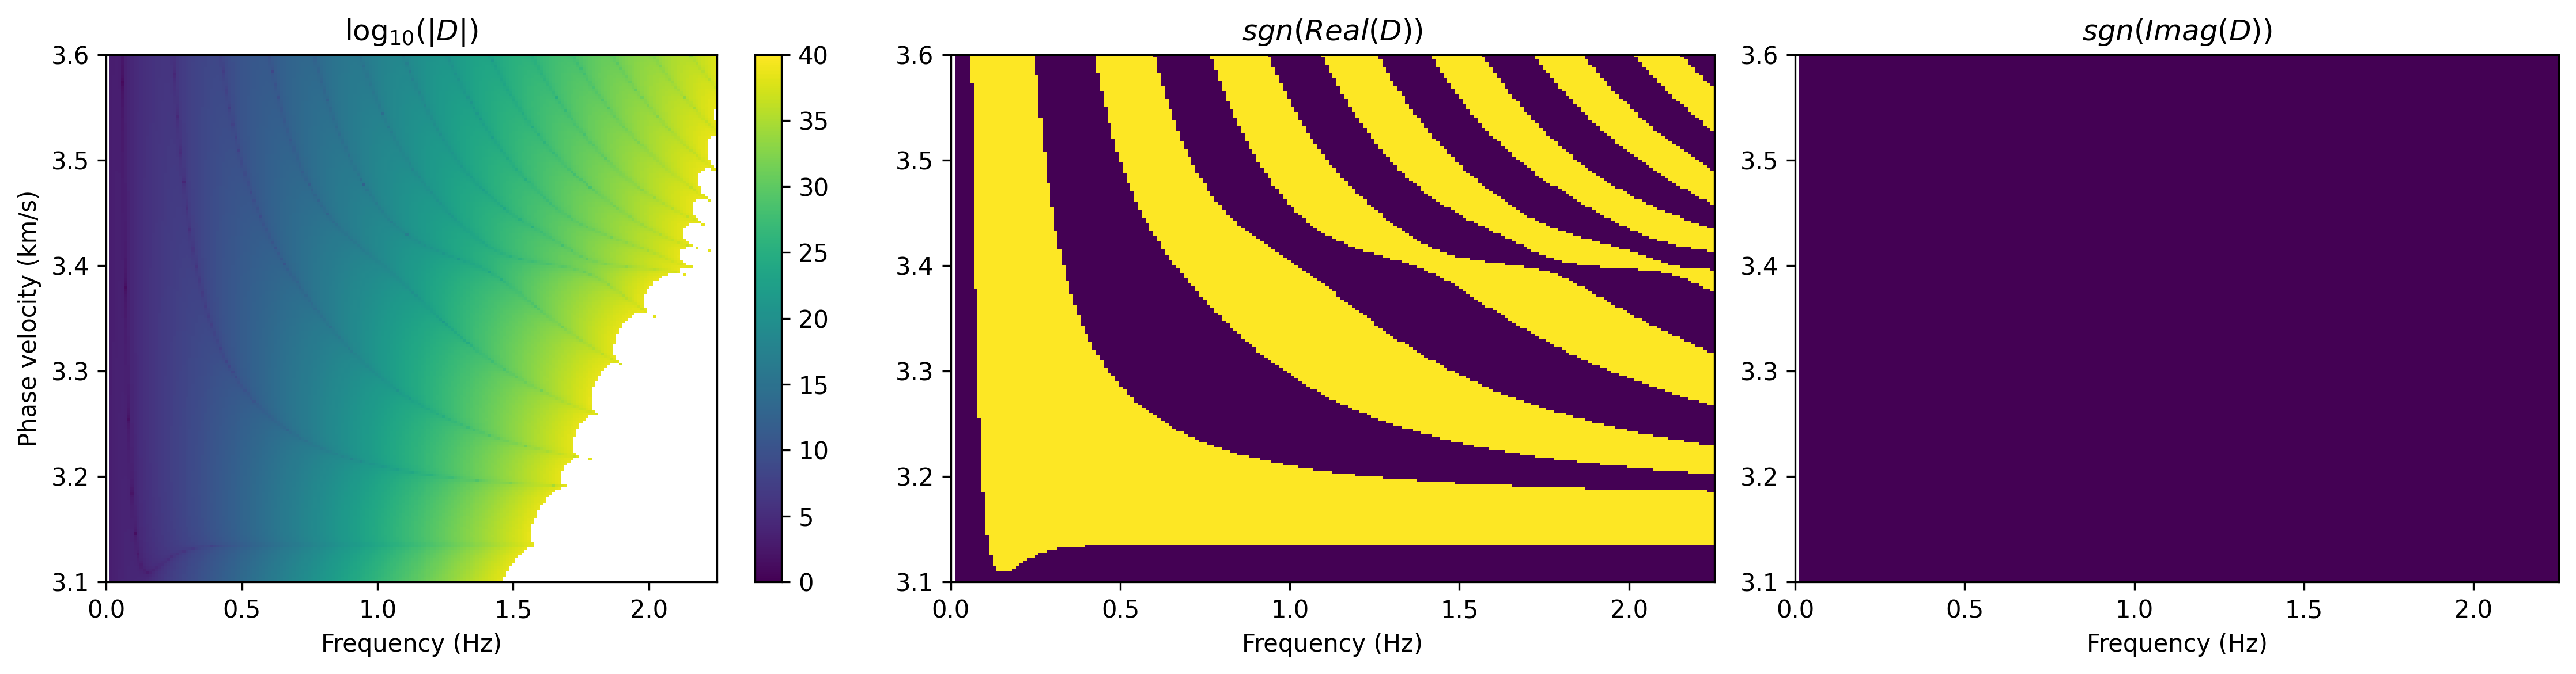

In [4]:
fig=plt.figure(figsize=(15, 4),dpi=300)

plt.subplot(1,3,1)
vmin=0
vmax=40
plt.imshow(np.log10(np.abs(surface_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin],vmin=vmin,vmax=vmax)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.colorbar()
plt.title(r"$\log_{10}(|D|)$")

plt.subplot(1,3,2)
plt.imshow(np.sign(np.real(surface_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin])
plt.xlabel("Frequency (Hz)")
# plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.title(r"$sgn(Real(D))$")

plt.subplot(1,3,3)
plt.imshow(np.sign(np.imag(surface_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin])
plt.xlabel("Frequency (Hz)")
# plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.title(r"$sgn(Imag(D))$")

plt.tight_layout()

plt.show()

In [5]:
# Trace dispersion curves

# find roots for a given phase velocity
df=(fmax-fmin)/(f.shape[0]-1)
c0=3.55
roots = cfroots(func=free_solid_halfspace_cf_real, fmin=fmin, fmax=fmax, df=df, phase_velocity=c0, nlayers=nlayers, vp=vp, vs=vs, density=rho, thickness=d)
nr = roots.size
print("found %d roots" %nr)

# dispersion curves starting from the above roots
cf_curves=np.empty(nr, dtype='object')
for i in range(nr):
    cf_curves[i] = cf_dispersion_curve(func=free_solid_halfspace_cf_real,phase_velocity=c0,frequency=roots[i],fmax=fmax,df=df,nlayers=nlayers, vp=vp, vs=vs, density=rho, thickness=d)

found 13 roots


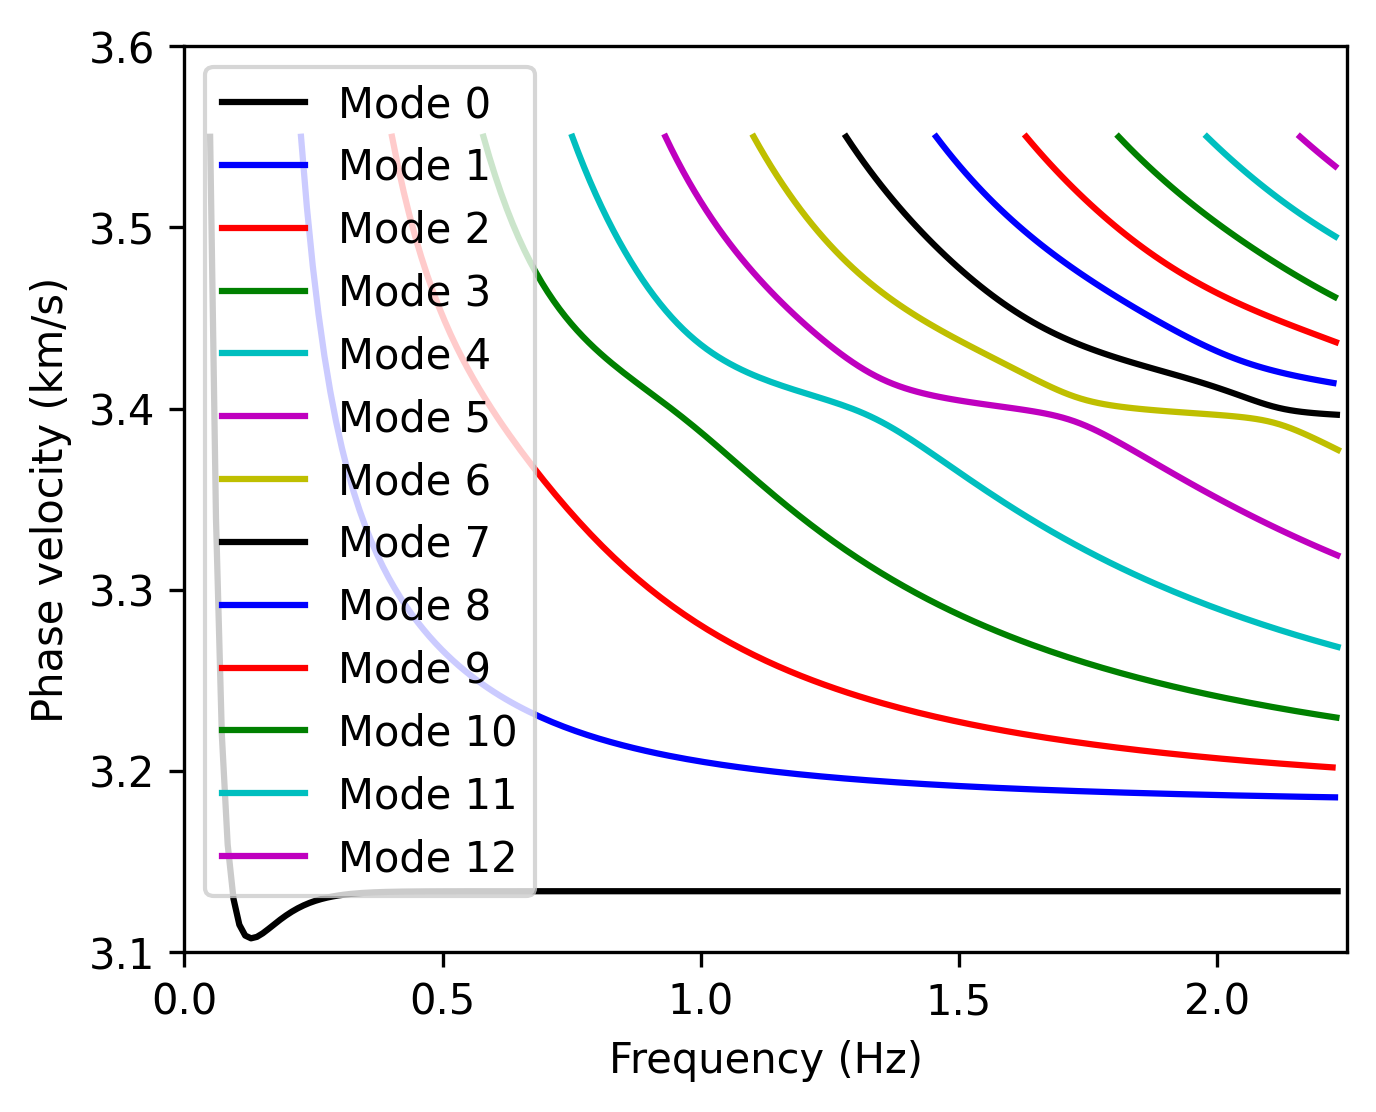

In [5]:
fig=plt.figure(figsize=(5, 4),dpi=300)

curves=np.empty(nr, dtype='object')
mpl.rcParams['axes.prop_cycle'] = cycler(color='kbrgcmy')

for i in range(nr):
    curves[i],=plt.plot(cf_curves[i][0,:],cf_curves[i][1,:])
    curves[i].set_label("Mode "+str(i))

plt.legend(loc='best')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (km/s)")
plt.xlim(fmin, fmax)
plt.ylim(cmin,cmax)

plt.show()

### Lamb waves (solid plate in a void)
Reproduce some results from the Wikipedia page

In [6]:
# Model
nlayers=1 # number of layers
poisson=0.34 # Aluminium plate
vs=np.array([1.0])
vp=vs*math.sqrt((2-2*poisson)/(1-2*poisson))
d=np.array([0.0001])

# define the size of the map
cmin=0.1
cmax=5*vs[0]
nc=1000
wdmin=0 
wdmax=20*vs[0]
nwd=2000
wd=np.linspace(wdmin,wdmax,num=nwd,dtype='float64')
c=np.linspace(cmin,cmax,num=nc,dtype='float64')
f=wd/(2*d*math.pi)

fmin=f[0]
fmax=f[-1]

# c-f (phase velocity-frequency) dispersion function map D(f,c)
lamb_waves_map=np.zeros((nc,nwd),dtype='complex64') # free surface on top and at the bottom
for i in range(nc):
    for j in range(nwd):
        lamb_waves_map[i][j] = disp.free_solid_free(frequency=f[j],wavenumber=2*math.pi*f[j]/c[i],nlayers=nlayers,vp=vp,vs=vs,density=rho,thickness=d)

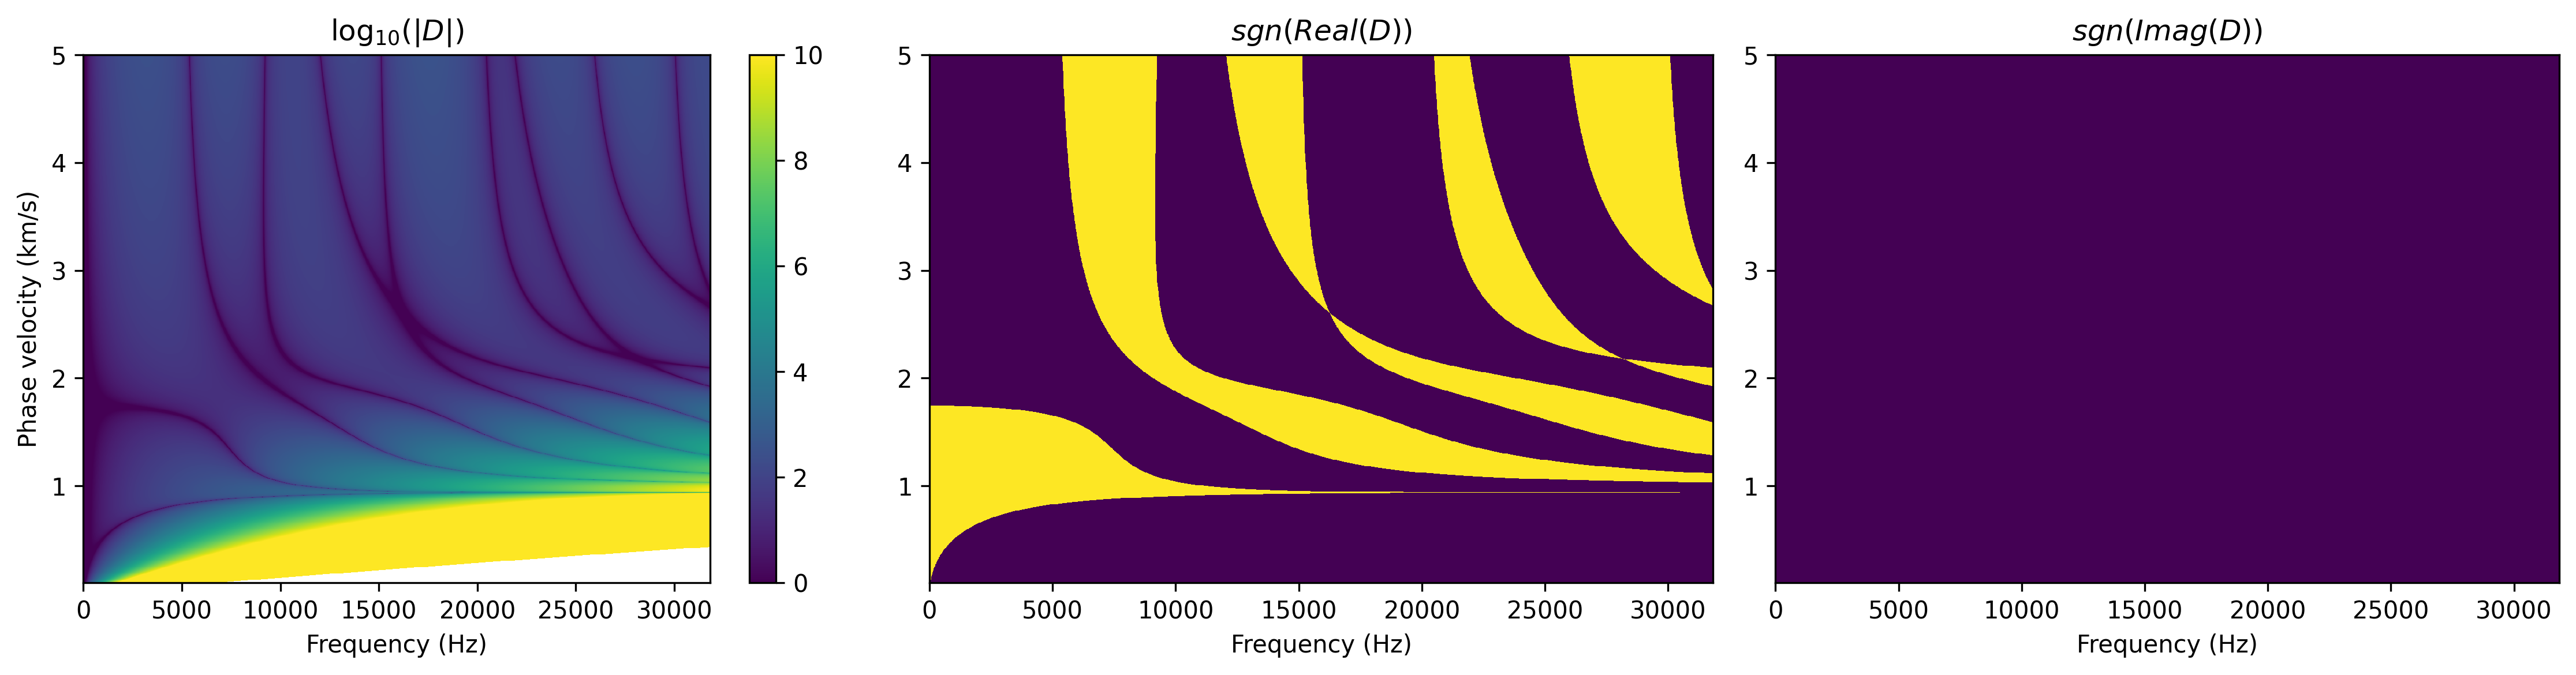

In [7]:
fig=plt.figure(figsize=(15, 4),dpi=300)

plt.subplot(1,3,1)
vmin=0
vmax=10
plt.imshow(np.log10(np.abs(lamb_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin],vmin=vmin,vmax=vmax)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.colorbar()
plt.title(r"$\log_{10}(|D|)$")

plt.subplot(1,3,2)
plt.imshow(np.sign(np.real(lamb_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin])
plt.xlabel("Frequency (Hz)")
# plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.title(r"$sgn(Real(D))$")

plt.subplot(1,3,3)
plt.imshow(np.sign(np.imag(lamb_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin])
plt.xlabel("Frequency (Hz)")
# plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.title(r"$sgn(Imag(D))$")

plt.tight_layout()

plt.show()

In [8]:
# Trace dispersion curves

# find the two roots corresponding to the fundamental symmetric and antisymmetric modes
df=(fmax-fmin)/(f.shape[0]-1)
c01=0.2
roots1 = cfroots(func=free_solid_free_cf_real, fmin=fmin, fmax=fmax, df=df, phase_velocity=c01, nlayers=nlayers, vp=vp, vs=vs, density=rho, thickness=d)
c02=1.72
roots2 = cfroots(func=free_solid_free_cf_real, fmin=fmin, fmax=fmax, df=df, phase_velocity=c02, nlayers=nlayers, vp=vp, vs=vs, density=rho, thickness=d)

# find roots for a given phase velocity
c0=3.6
roots3 = cfroots(func=free_solid_free_cf_real, fmin=fmin, fmax=fmax, df=df, phase_velocity=c0, nlayers=nlayers, vp=vp, vs=vs, density=rho, thickness=d)

roots=np.zeros(roots3.shape[0]+2)
roots[0]=roots1[0]
roots[1]=roots2[0]
roots[2:]=roots3[:]
nr = roots.size
print("found %d roots" %nr)

# dispersion curves starting from the above roots
cf_curves=np.empty(nr, dtype='object')
cf_curves[0] = cf_dispersion_curve(func=free_solid_free_cf_real,phase_velocity=c01,frequency=roots[0],fmax=fmax,df=df,nlayers=nlayers, vp=vp, vs=vs, density=rho, thickness=d)
cf_curves[1] = cf_dispersion_curve(func=free_solid_free_cf_real,phase_velocity=c02,frequency=roots[1],fmax=fmax,df=df,nlayers=nlayers, vp=vp, vs=vs, density=rho, thickness=d)
for i in range(2,nr):
    cf_curves[i] = cf_dispersion_curve(func=free_solid_free_cf_real,phase_velocity=c0,frequency=roots[i],fmax=fmax,df=df,nlayers=nlayers, vp=vp, vs=vs, density=rho, thickness=d)

found 10 roots


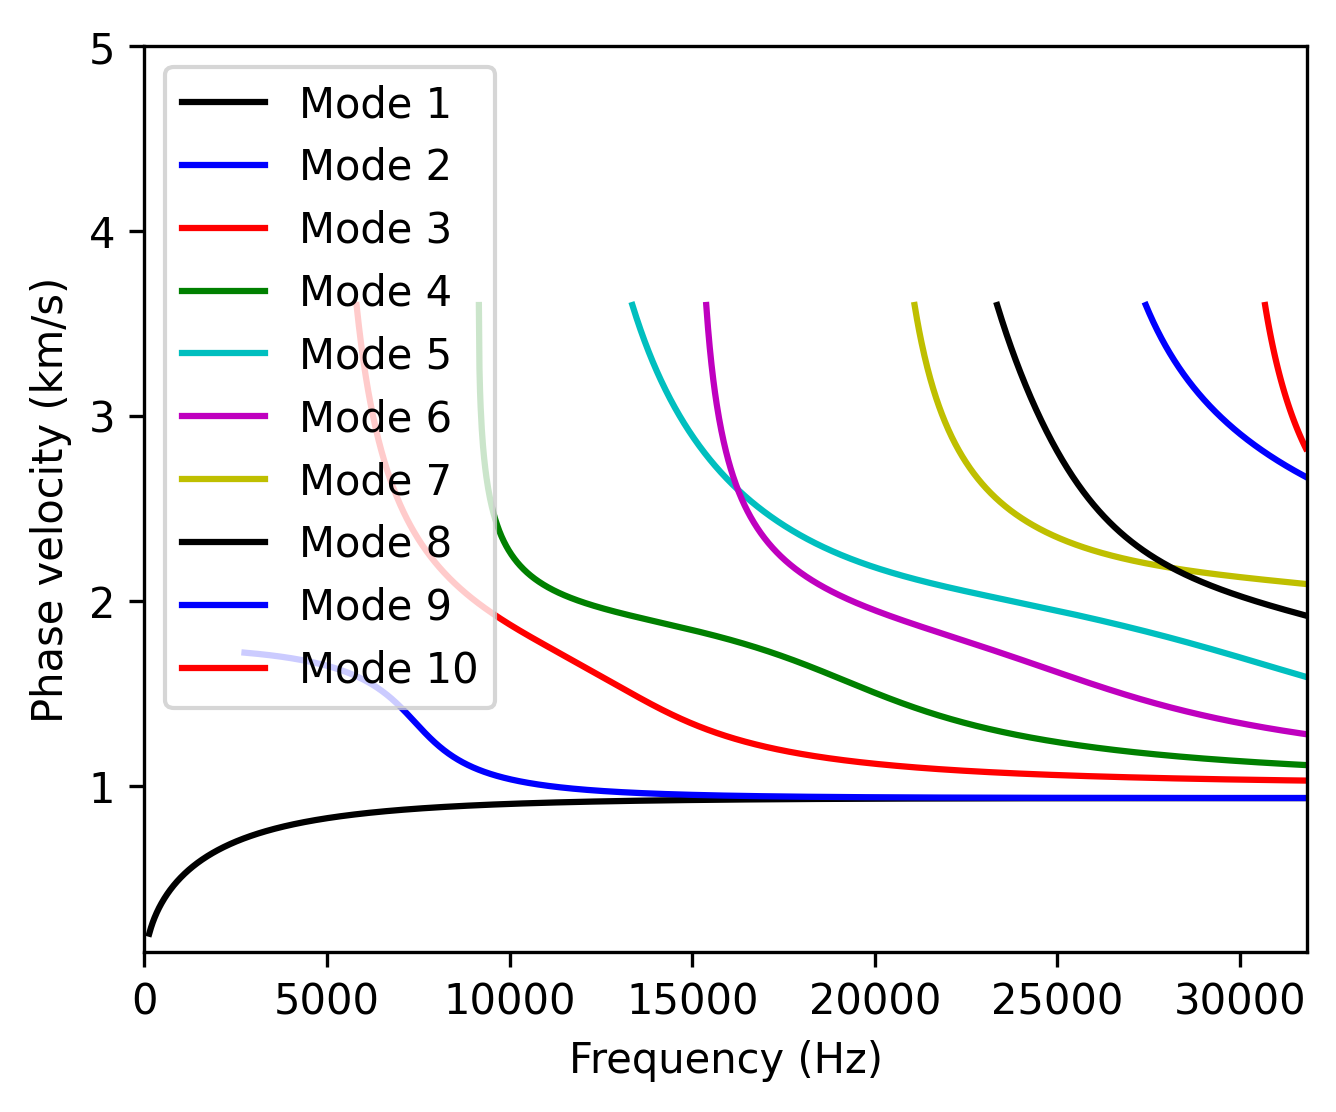

In [9]:
fig=plt.figure(figsize=(5, 4),dpi=300)

curves=np.empty(nr, dtype='object')
mpl.rcParams['axes.prop_cycle'] = cycler(color='kbrgcmy')

for i in range(nr):
    curves[i],=plt.plot(cf_curves[i][0,:],cf_curves[i][1,:])
    curves[i].set_label("Mode "+str(i+1))

plt.legend(loc='best')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (km/s)")
plt.xlim(fmin, fmax)
plt.ylim(cmin,cmax)

plt.show()

### Guided waves (perfect elastic waveguide)

In [9]:
# Model
nlayers=1 # number of layers
vp=np.array([3.0])
vs=np.array([1.7])
rho=np.array([2])
d=np.array([0.015])

# define the size of the map
cmin=1.5
cmax=6
nc=500
fmin=0
fmax=500
nf=500
f=np.linspace(fmin,fmax,num=nf,dtype='float64')
c=np.linspace(cmin,cmax,num=nc,dtype='float64')

# c-f (phase velocity-frequency) dispersion function map D(f,c)
guided_waves_map=np.zeros((nc,nf),dtype='complex64') # rigid wall on top and at the bottom
for i in range(nc):
    for j in range(nf):
        guided_waves_map[i][j] = disp.rigid_solid_rigid(frequency=f[j],wavenumber=2*math.pi*f[j]/c[i],nlayers=nlayers,vp=vp,vs=vs,density=rho,thickness=d)

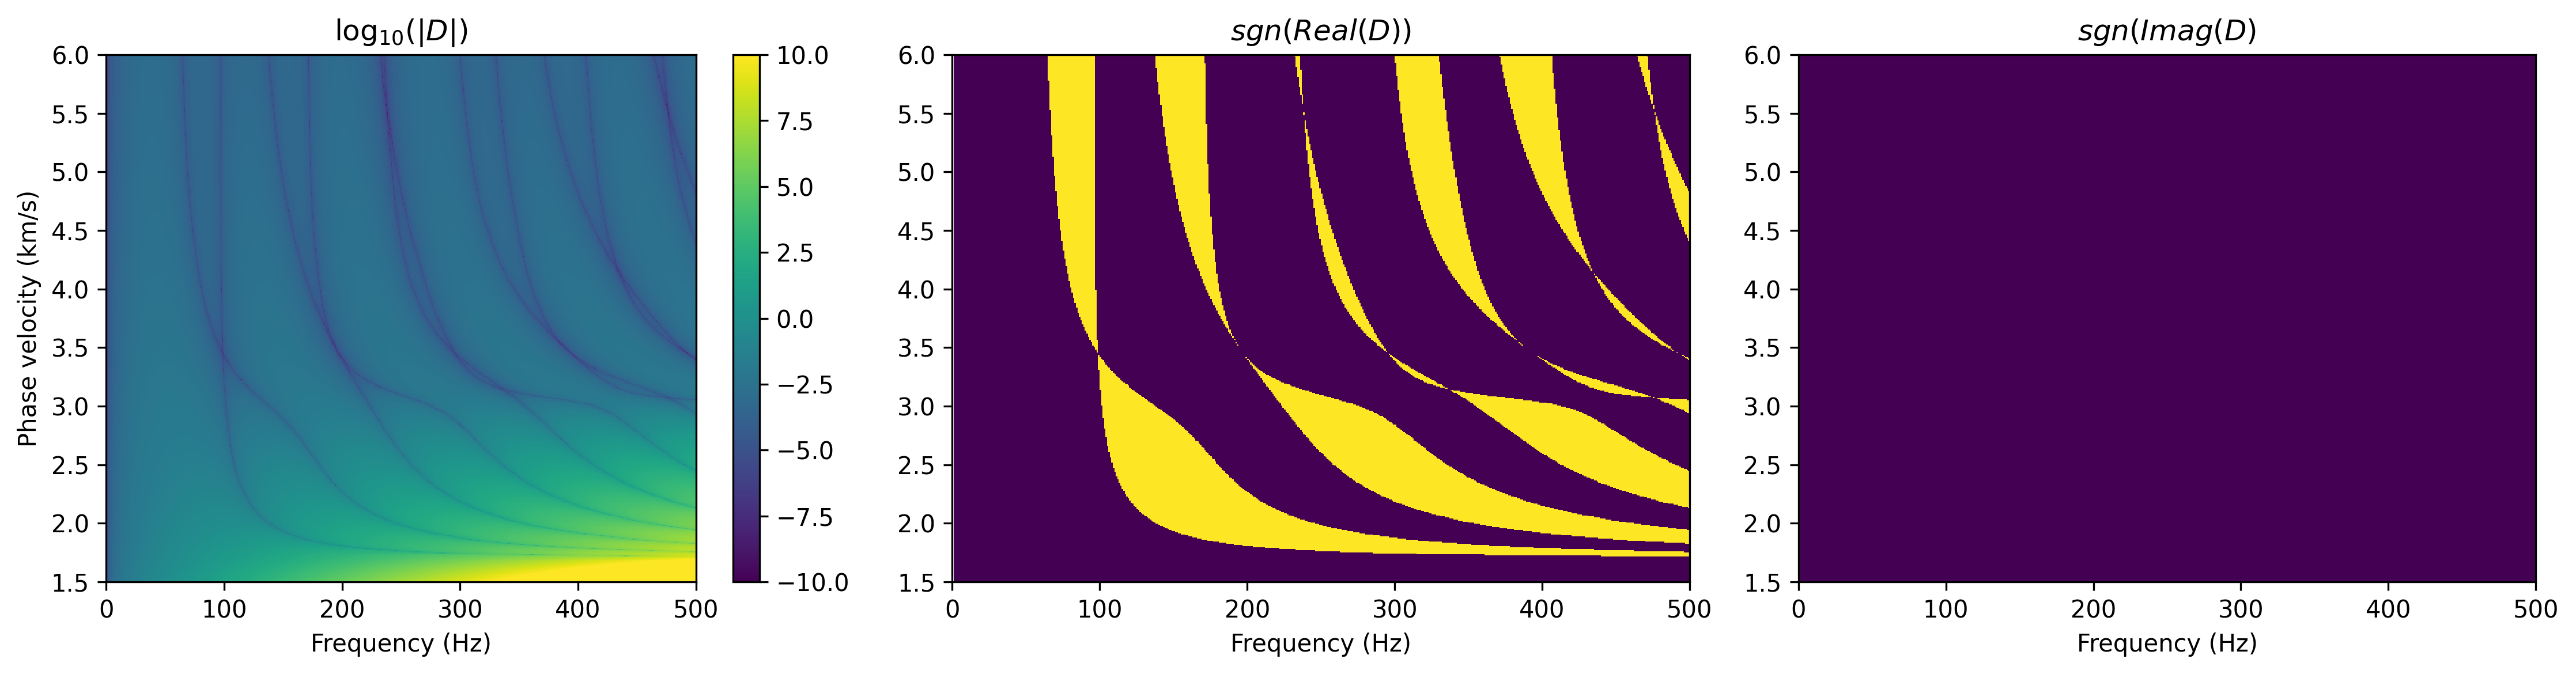

In [10]:
fig=plt.figure(figsize=(15, 4),dpi=300)

plt.subplot(1,3,1)
vmin=-10
vmax=10
plt.imshow(np.log10(np.abs(guided_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin],vmin=vmin,vmax=vmax)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.colorbar()
plt.title(r"$\log_{10}(|D|)$")

plt.subplot(1,3,2)
plt.imshow(np.sign(np.real(guided_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin])
plt.xlabel("Frequency (Hz)")
# plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.title(r"$sgn(Real(D))$")

plt.subplot(1,3,3)
plt.imshow(np.sign(np.imag(lamb_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin])
plt.xlabel("Frequency (Hz)")
# plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.title(r"$sgn(Imag(D)$")

plt.tight_layout()

plt.show()

In [11]:
# Trace dispersion curves

# find roots for a given phase velocity
df=(fmax-fmin)/(f.shape[0]-1)
c0=5
roots = cfroots(func=rigid_solid_rigid_cf_real, fmin=fmin, fmax=fmax, df=df, phase_velocity=c0, nlayers=nlayers, vp=vp, vs=vs, density=rho, thickness=d)
nr = roots.size
print("found %d roots" %nr)

# dispersion curves starting from the above roots
cf_curves=np.empty(nr, dtype='object')
for i in range(nr):
    cf_curves[i] = cf_dispersion_curve(func=rigid_solid_rigid_cf_real,phase_velocity=c0,frequency=roots[i],fmax=fmax,df=df,nlayers=nlayers, vp=vp, vs=vs, density=rho, thickness=d)

found 12 roots


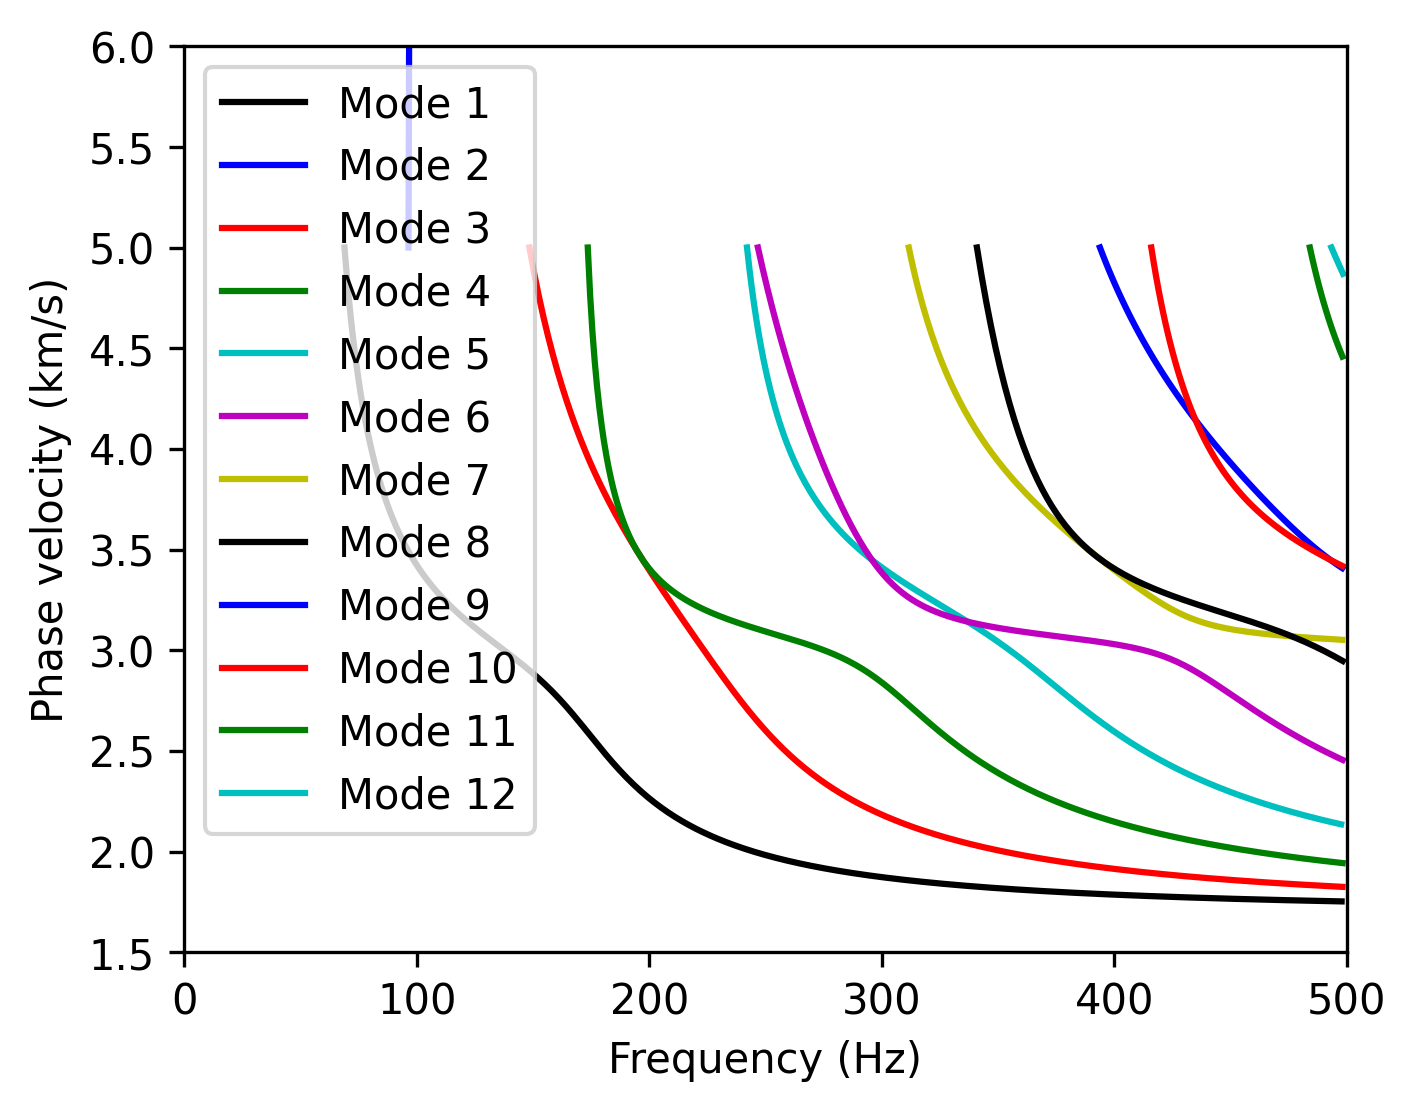

In [13]:
fig=plt.figure(figsize=(5, 4),dpi=300)

curves=np.empty(nr, dtype='object')
mpl.rcParams['axes.prop_cycle'] = cycler(color='kbrgcmy')

for i in range(nr):
    curves[i],=plt.plot(cf_curves[i][0,:],cf_curves[i][1,:])
    curves[i].set_label("Mode "+str(i+1))

plt.legend(loc='best')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (km/s)")
plt.xlim(fmin, fmax)
plt.ylim(cmin,cmax)

plt.show()

### Embedded waves (layer sandwiched between half-spaces: imperfect elastic waveguide)

In [12]:
# Model
nlayers=3 # number of layers
vp=np.array([4.5,3.0,5.5])
vs=np.array([2.3,1.7,2.7])
rho=np.array([2.3,2,2.5])
d=np.array([100,0.015,100])

# define the size of the map
cmin=1.5
cmax=6
nc=500
fmin=0
fmax=500
nf=500
f=np.linspace(fmin,fmax,num=nf,dtype='float64')
c=np.linspace(cmin,cmax,num=nc,dtype='float64')

# c-f (phase velocity-frequency) dispersion function map D(f,c)
embedded_waves_map=np.zeros((nc,nf),dtype='complex64') # half-space on top and at the bottom
for i in range(nc):
    for j in range(nf):
        embedded_waves_map[i][j] = disp.halfspace_solid_halfspace(frequency=f[j],wavenumber=2*math.pi*f[j]/c[i],nlayers=nlayers,vp=vp,vs=vs,density=rho,thickness=d)

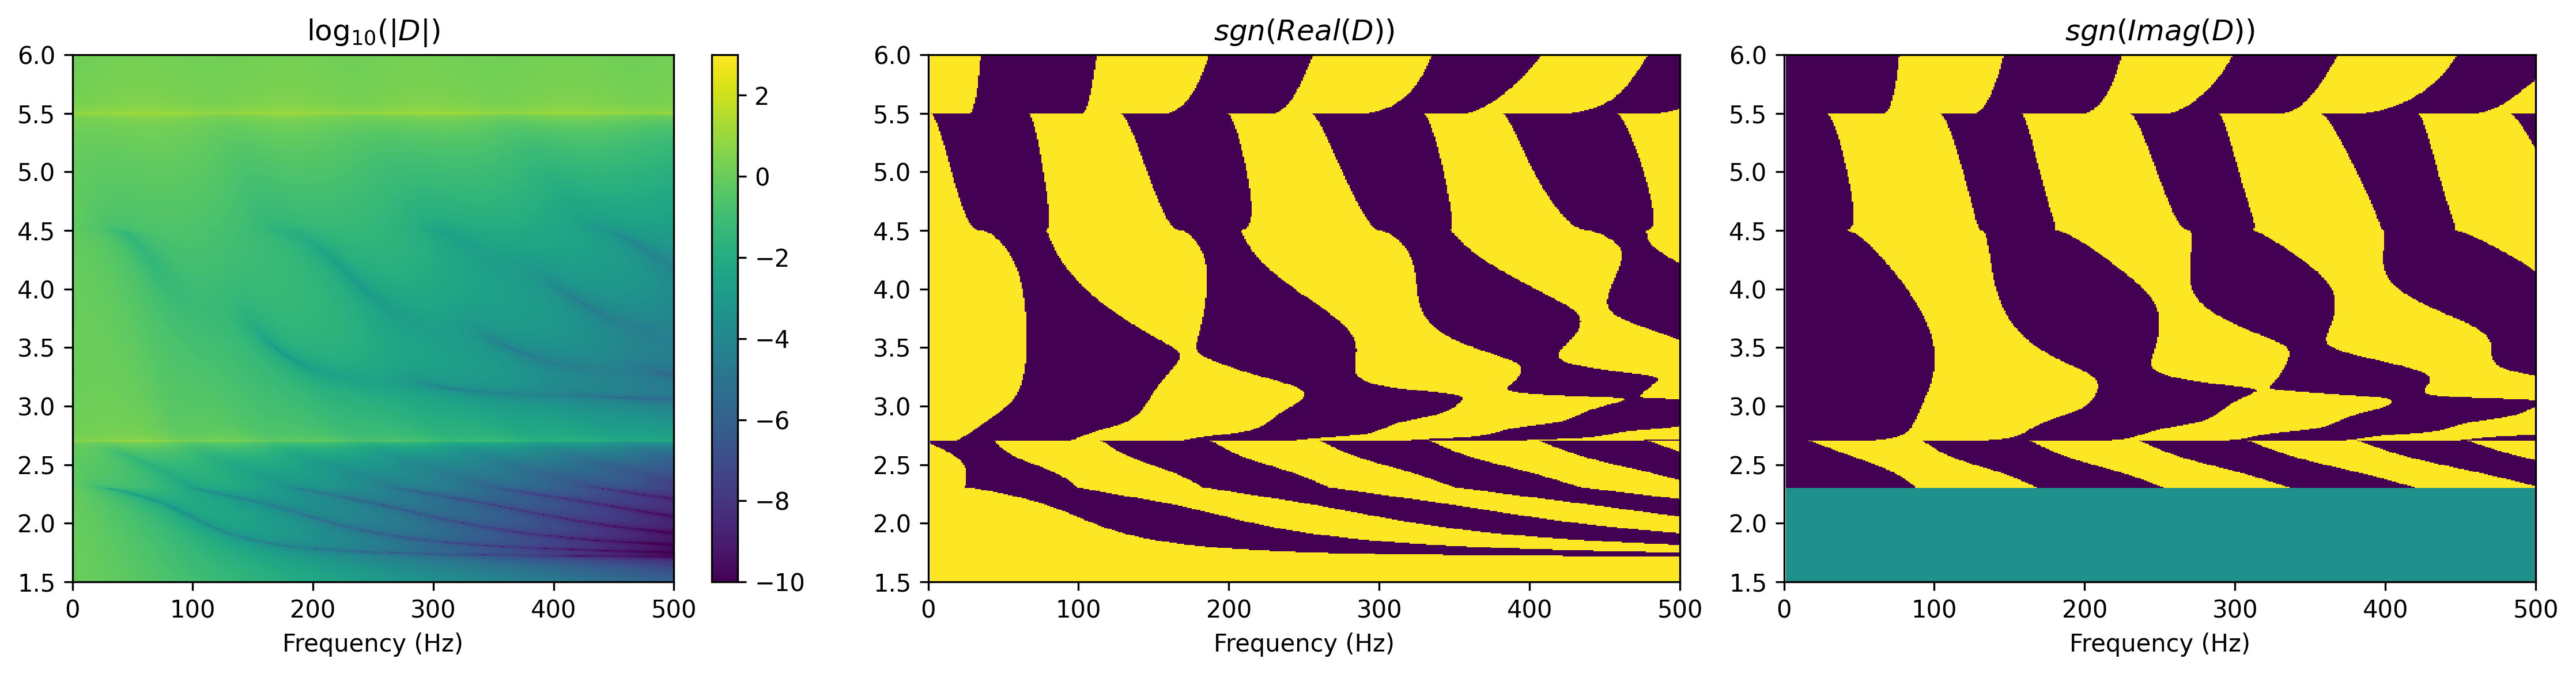

In [15]:
fig=plt.figure(figsize=(15, 4),dpi=300)

plt.subplot(1,3,1)
vmin=-10
vmax=3
plt.imshow(np.log10(np.abs(embedded_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin],vmin=vmin,vmax=vmax)
plt.xlabel("Frequency (Hz)")
# plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.colorbar()
plt.title(r"$\log_{10}(|D|)$")

plt.subplot(1,3,2)
plt.imshow(np.sign(np.real(embedded_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin])
plt.xlabel("Frequency (Hz)")
# plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.title(r"$sgn(Real(D))$")

plt.subplot(1,3,3)
plt.imshow(np.sign(np.imag(embedded_waves_map)),interpolation='none',aspect="auto",extent=[fmin,fmax,cmax,cmin])
plt.xlabel("Frequency (Hz)")
# plt.ylabel("Phase velocity (km/s)")
plt.gca().invert_yaxis()
plt.title(r"$sgn(Imag(D))$")

plt.tight_layout()

plt.show()

In [16]:
# Trace dispersion curves

# find roots for a given phase velocity
df=(fmax-fmin)/(f.shape[0]-1)
c0=2.25
roots = cfroots(func=halfspace_solid_halfspace_cf_real, fmin=fmin, fmax=fmax, df=df, phase_velocity=c0, nlayers=nlayers, vp=vp, vs=vs, density=rho, thickness=d)
nr = roots.size
print("found %d roots" %nr)

# dispersion curves starting from the above roots
cf_curves=np.empty(nr, dtype='object')
for i in range(nr):
    cf_curves[i] = cf_dispersion_curve(func=halfspace_solid_halfspace_cf_real,phase_velocity=c0,frequency=roots[i],fmax=fmax,df=df,nlayers=nlayers, vp=vp, vs=vs, density=rho, thickness=d)

found 6 roots


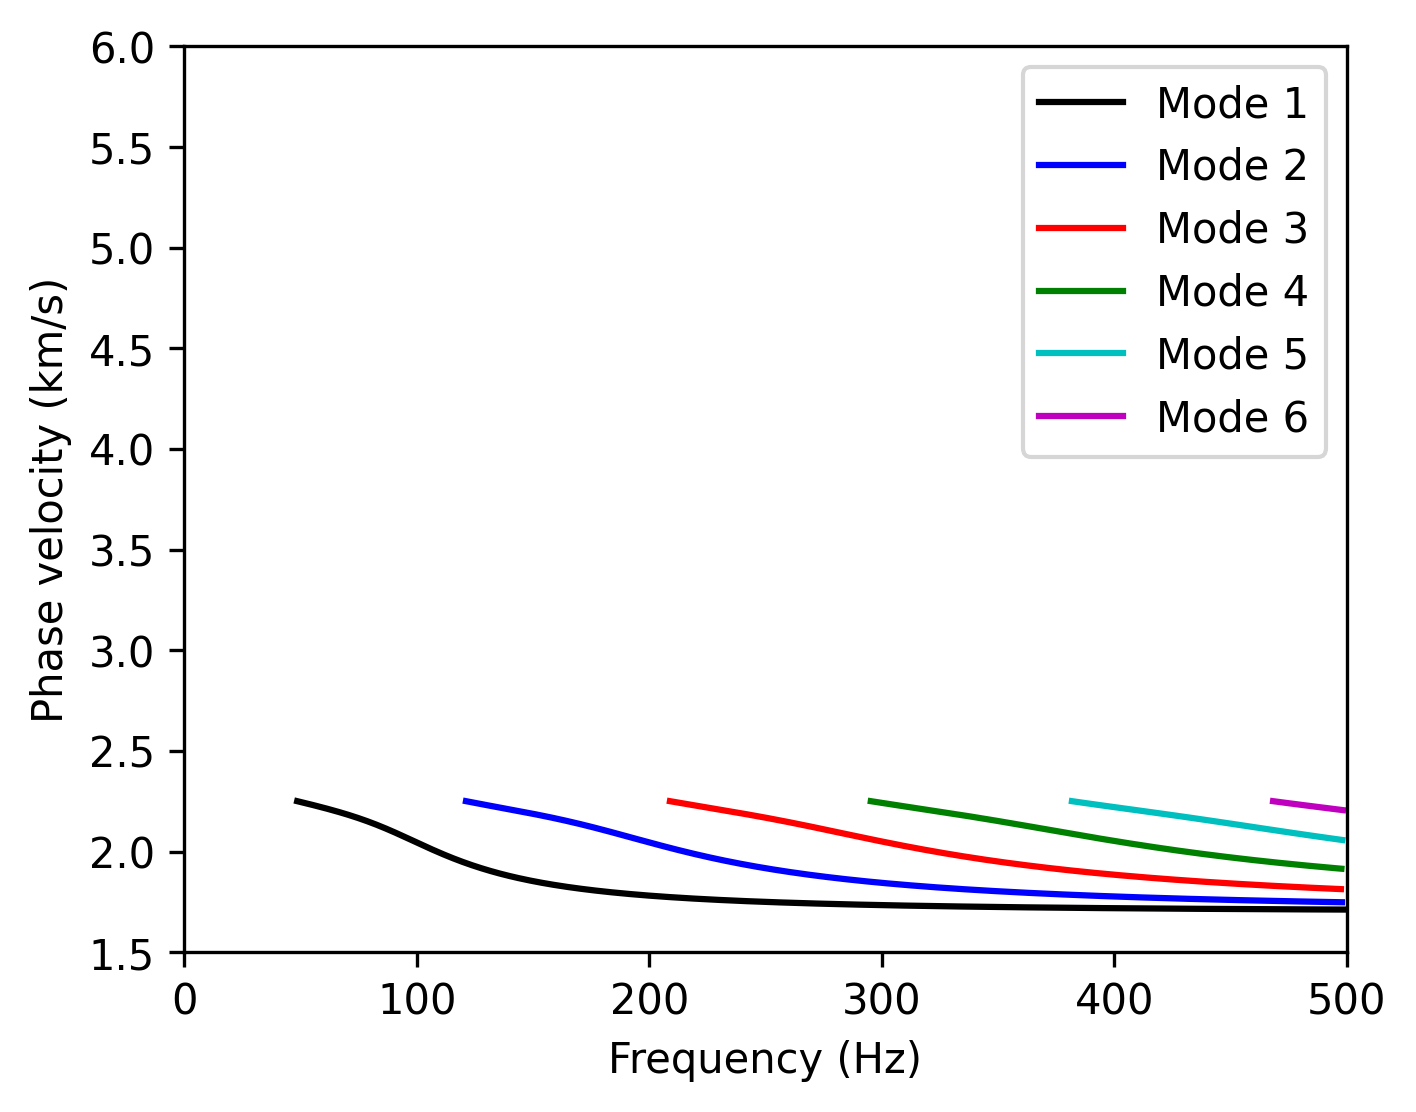

In [17]:
fig=plt.figure(figsize=(5, 4),dpi=300)

curves=np.empty(nr, dtype='object')
mpl.rcParams['axes.prop_cycle'] = cycler(color='kbrgcmy')

for i in range(nr):
    curves[i],=plt.plot(cf_curves[i][0,:],cf_curves[i][1,:])
    curves[i].set_label("Mode "+str(i+1))

plt.legend(loc='best')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (km/s)")
plt.xlim(fmin, fmax)
plt.ylim(cmin,cmax)

plt.show()